In [2]:
import edgarRequestHelper as edgarRequestHelper
import edgarTickerHelper as edgarTickerHelper

from time import sleep
import json

In [3]:
with open('atr_spy.txt', 'r') as f:
    ticker_list = f.read().splitlines()


In [4]:
annual_results = {}
for ticker in ticker_list:
    try:
        annual_results[ticker] = {}
        CIK = edgarTickerHelper.ticker_mapper(ticker)
        netIncomeLoss = edgarRequestHelper.get_concepts(CIK, "NetIncomeLoss") # Get net income for the given company, over every year of its existence

        for entry in netIncomeLoss["units"]["USD"]:
            if entry["fp"]=="FY":
                annual_results[ticker][entry["fy"]] = entry["val"]
        sleep(0.08)


        # neg=False

        # for year in annual_results[ticker]:
        #     if annual_results[ticker][year] < 0:
        #         neg=True
        
    #     # Get first year of existence
    #     first_year = min(annual_results[ticker].keys())
    #     # Get last year of existence
    #     last_year = max(annual_results[ticker].keys())
    #     # Check if the company has grown every year

    #     pos = True
    #     for year in range(first_year, last_year - 1):
    #         if annual_results[ticker][year] > annual_results[ticker][year + 1]:
    #             pos = False
    #             break
                
    #     if pos==True and neg==False:
    #         f.write(ticker + " positive long term growth company \n")

    #     pos2 = True
    #     if first_year < last_year-10 and pos==False:
    #         for year in range(first_year, last_year - 10):
    #             if annual_results[ticker][year] > annual_results[ticker][year + 1]:
    #                 pos2 = False
    #                 break

    #     if pos2==True and neg==False:
    #         f.write(ticker + " positive ten year term growth company \n")


    #     if neg==False:
    #         f.write(ticker + " is positive every year \n")
    except:
        print("Error with ticker: " + ticker)
        continue



Error in json:get_concepts
Error with ticker: CI
Error in json:get_concepts
Error with ticker: CMA
Error in json:get_concepts
Error with ticker: FOX


In [27]:
# Write list of positive growth companies to file
with open("l.json", "a") as f:
    f.write(json.dumps(annual_results))

In [35]:
# Make second copy of annual_results
annual_results2 = annual_results.copy()
print(len(annual_results2))
# Remove companies that have any negative values
for ticker in annual_results2:
    for year in annual_results2[ticker]:
        if annual_results2[ticker][year] < 0:
            del annual_results[ticker]
            break
print(len(annual_results))

273
273


In [36]:
with open("l2.json", "a") as f:
    f.write(json.dumps(annual_results))

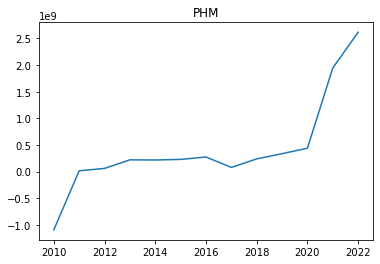

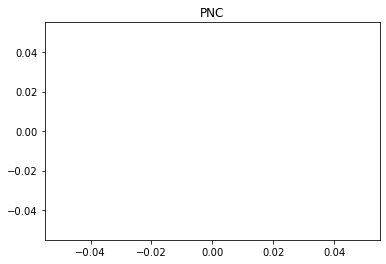

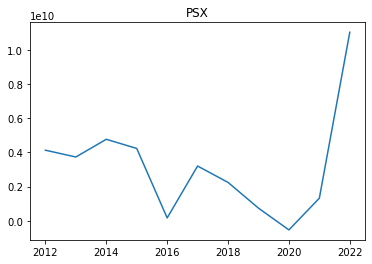

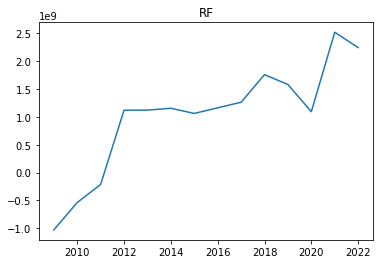

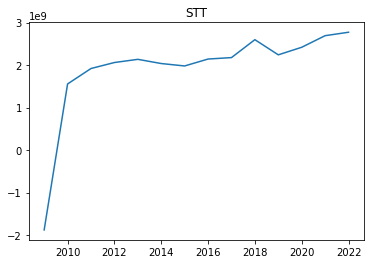

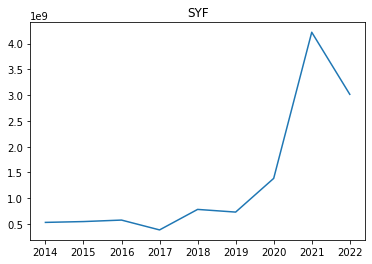

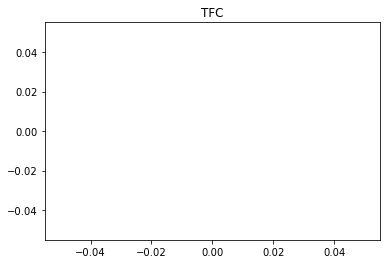

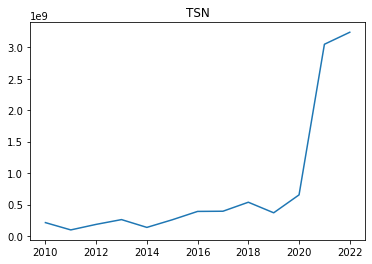

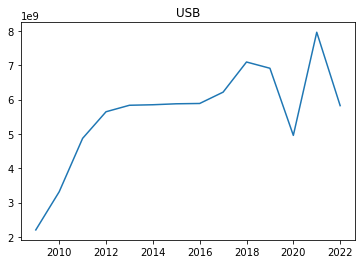

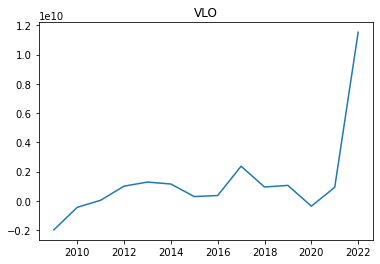

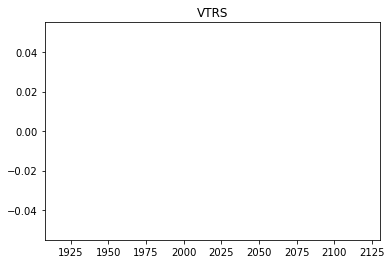

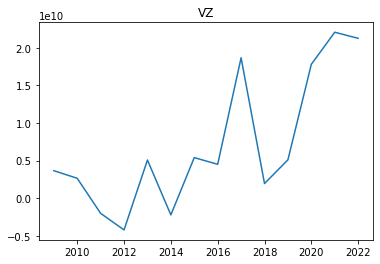

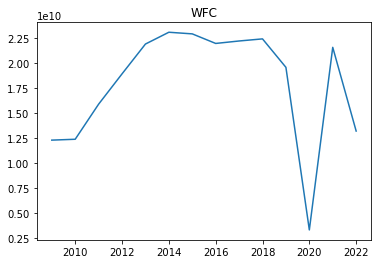

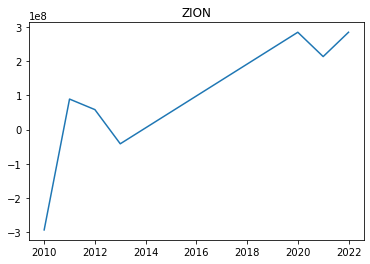

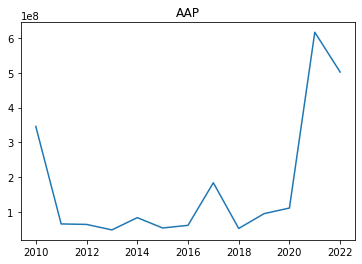

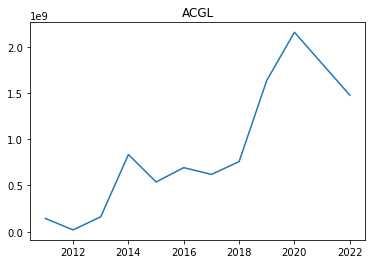

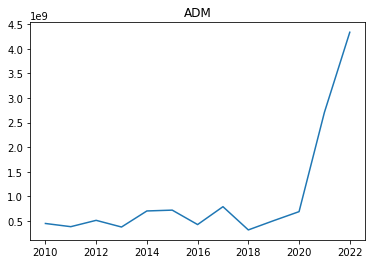

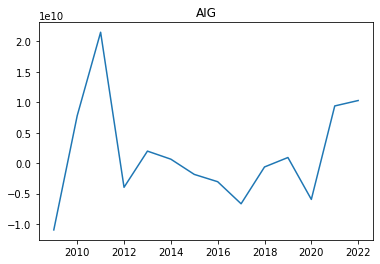

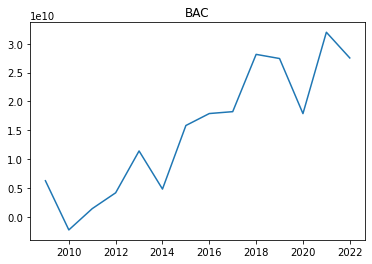

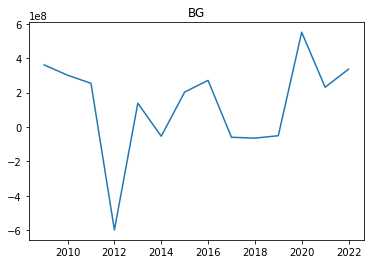

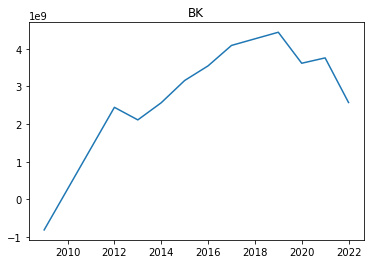

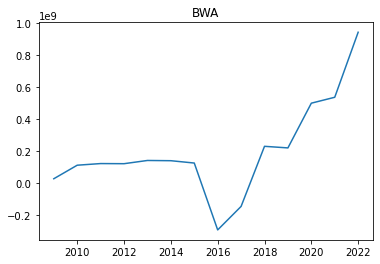

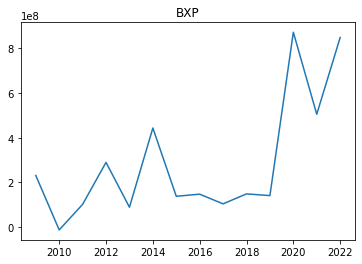

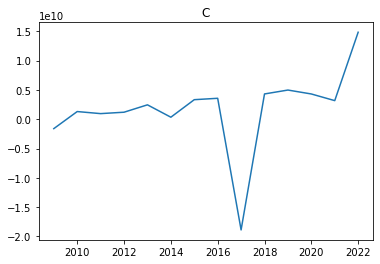

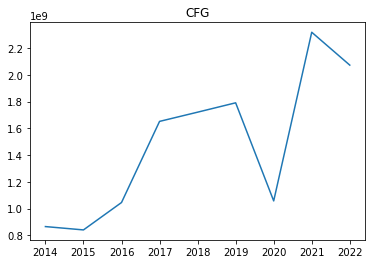

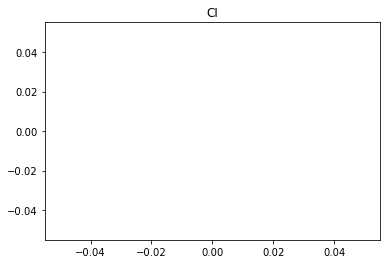

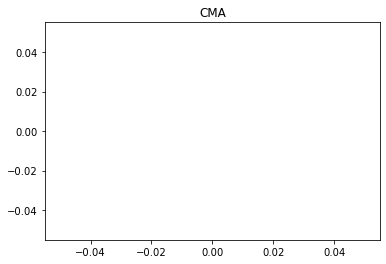

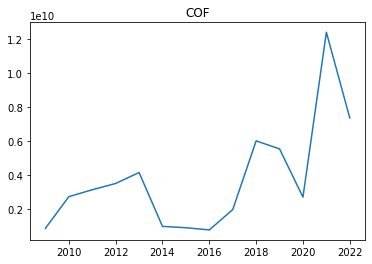

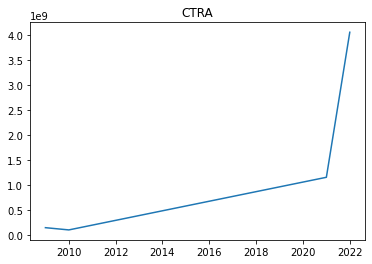

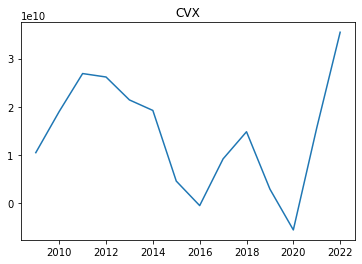

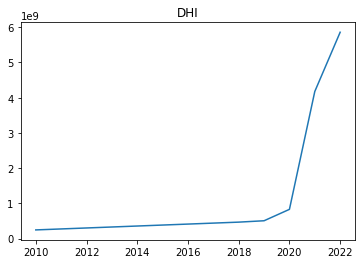

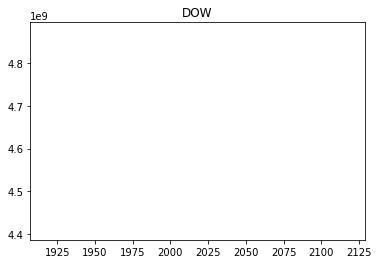

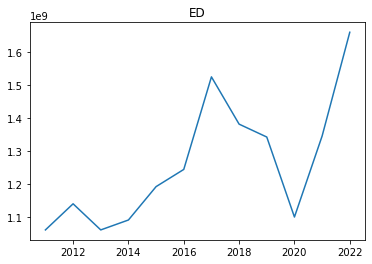

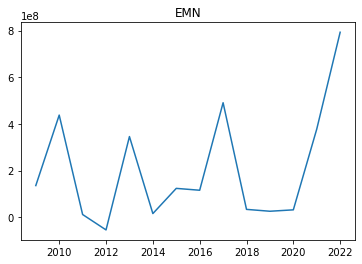

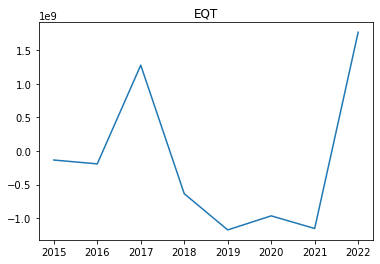

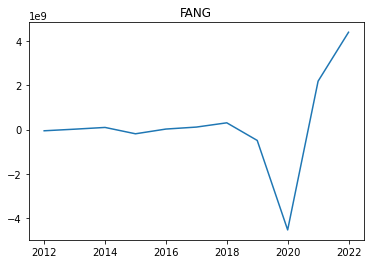

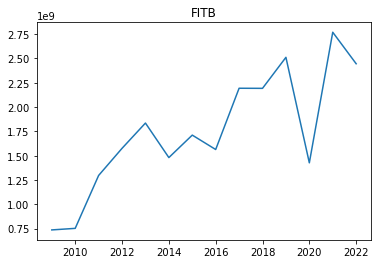

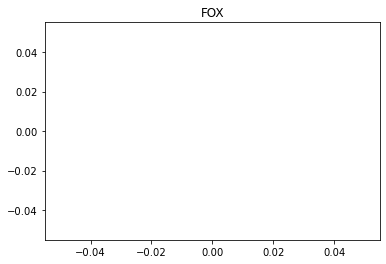

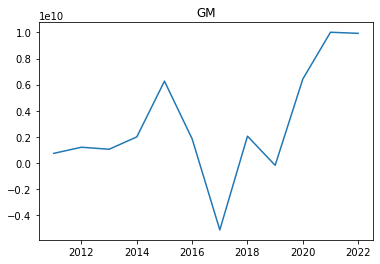

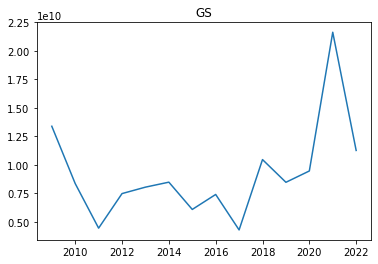

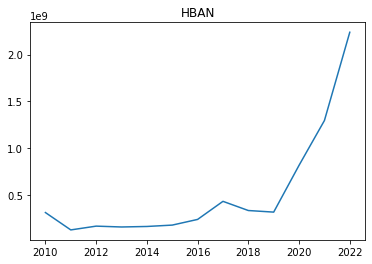

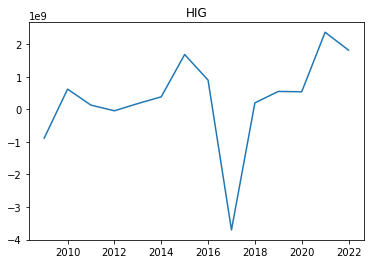

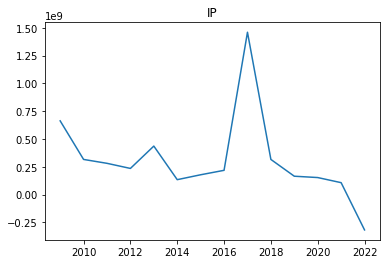

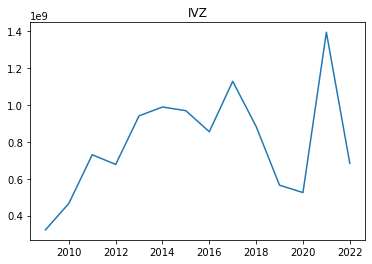

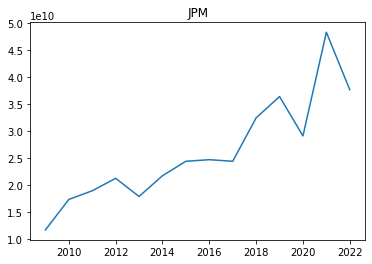

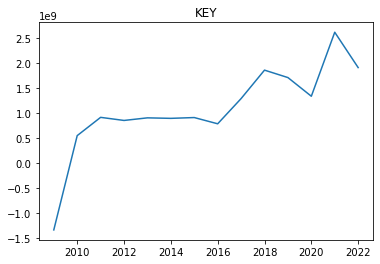

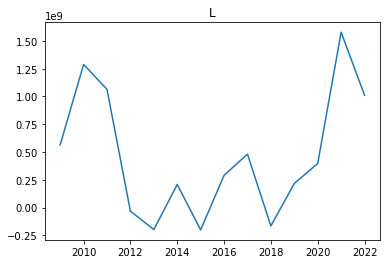

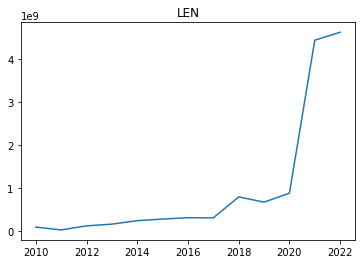

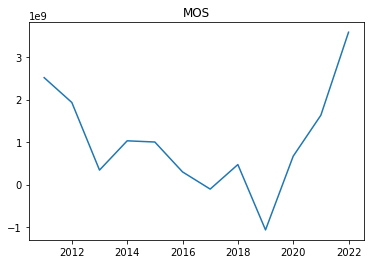

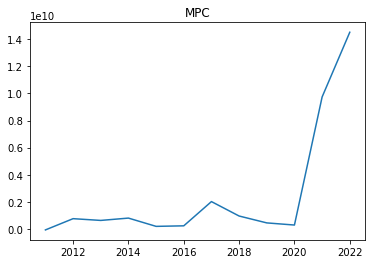

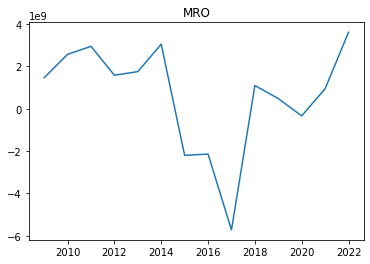

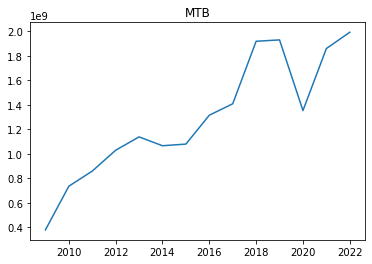

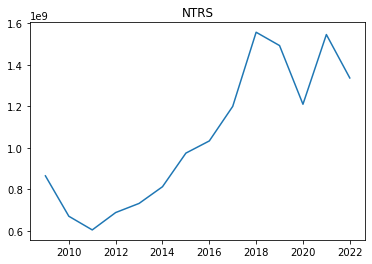

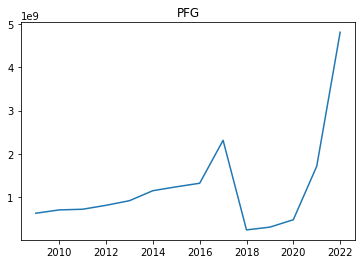

In [5]:
# Display 10x10 graphs of companies that have positive growth every year
import matplotlib.pyplot as plt
import numpy as np

# Do not show in exponantial notation, plot
for ticker in annual_results:
    plt.plot(annual_results[ticker].keys(), annual_results[ticker].values())
    plt.title(ticker)
    plt.show()
    

In [27]:
stable_list = {}

for ticker in annual_results:
    neg=False
    for year in annual_results[ticker]:
        if annual_results[ticker][year] < 1:
            neg=True
    if neg==False:
        if len(annual_results[ticker]) > 5:
            stable_list[ticker] = annual_results[ticker]

print(len(stable_list))


346


In [28]:
#CAGR
gr_list = {}
print(stable_list)
for e in stable_list:
    
    years = list(stable_list[e].keys())
    years.sort()
    l = []
    for i in range(len(years)-1):
        if years[i+1] - years[i] == 1:
            # Get change between years
            change = stable_list[e][years[i+1]] - stable_list[e][years[i]]
            print(stable_list[e][years[i]])
            gr = change / stable_list[e][years[i]]
            l.append(gr)
    gr_list[e] = sum(l)/len(l)

print(gr_list)


{'SAIA': {2011: 11373000, 2012: 5406000, 2013: 8064000, 2014: 13569000, 2015: 11387000, 2016: 10348000, 2017: 47759000, 2018: 25380000, 2019: 21419000, 2020: 40236000, 2021: 253235000, 2022: 357422000}, 'TXRH': {2017: 28618000, 2018: 30332000, 2019: 42686000, 2020: 19549000, 2021: 245294000, 2022: 269818000}, 'KNSL': {2016: 6871000, 2017: 5924000, 2018: 4448000, 2019: 17853000, 2020: 38181000, 2021: 152659000, 2022: 159114000}, 'RBC': {2010: 34868000, 2011: 49997000, 2012: 56342000, 2013: 60208000, 2014: 58248000, 2015: 63894000, 2016: 70623000, 2017: 87141000, 2018: 105193000, 2019: 126036000, 2021: 89633000, 2022: 54710000}, 'WING': {2015: 3795000, 2016: 4312000, 2017: 10497000, 2018: 2419000, 2019: 3047000, 2020: 23306000, 2021: 42658000, 2022: 52947000}, 'ADC': {2011: 9551142, 2012: 18049444, 2013: 19674575, 2014: 18487992, 2015: 39017855, 2016: 45118000, 2017: 58112000, 2018: 13212000, 2019: 22559000, 2020: 91381000, 2021: 122273000, 2022: 152437000}, 'SIGI': {2010: 65541000, 2011

In [30]:
# Sort gr_list by highest CAGR
sorted_gr_list = sorted(gr_list.items(), key=lambda x: x[1], reverse=True)
import json
#Save to file
with open('stable_list.json', 'w') as f:
    json.dump(sorted_gr_list, f, indent=4)



In [31]:
sorted_gr_list

[('IMKTA', 106.88582412415413),
 ('NUS', 99.75567947378124),
 ('QLYS', 57.97939391008951),
 ('URBN', 22.77679586687768),
 ('BWFG', 10.093911300726049),
 ('MPB', 8.413593370678269),
 ('FBRT', 6.206628719367428),
 ('CCBG', 5.145225426242092),
 ('CMRE', 4.345406461301258),
 ('SLP', 3.9623521295258946),
 ('FF', 3.767658381211136),
 ('FCPT', 3.7599927317013675),
 ('SPNS', 3.6783295441359956),
 ('ALRM', 3.458644023725061),
 ('OMCL', 3.442558755211928),
 ('DENN', 2.9102472665651433),
 ('PLXS', 2.9057171282941217),
 ('OLP', 2.8798371391177957),
 ('ALX', 2.876525643984041),
 ('SPWH', 2.855498166932104),
 ('DEA', 2.833662086466892),
 ('AMSF', 2.6586273207755213),
 ('MATX', 2.5619843761164423),
 ('KAI', 2.4195615685771354),
 ('IRMD', 2.396283856588923),
 ('TXRH', 2.314556930855059),
 ('KLIC', 2.197922650810931),
 ('FFIC', 2.0135371443719623),
 ('UHT', 2.0057504804300557),
 ('GES', 1.9933824882624926),
 ('ATKR', 1.9807965339834865),
 ('CARG', 1.923802924351429),
 ('SXI', 1.881668694074809),
 ('HLI